Housing Price Prediction


In [2]:

# Housing Price Prediction


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# 1) Load dataset

df = pd.read_csv("/content/housing.csv")


# 2) Handle missing values

df["total_bedrooms"].fillna(df["total_bedrooms"].median(), inplace=True)


# 3) One-Hot Encoding (FIX FOR ERROR)

df = pd.get_dummies(df, columns=["ocean_proximity"], drop_first=True)


# 4) Split features and target

X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]


# 5) Train-test split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6) Feature Scaling

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 7) Train Models
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


# 8) Predictions

y_pred_lr = lr.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test)

# ---------------------------
# 9) Evaluation
# ---------------------------
print("Linear Regression R2:", r2_score(y_test, y_pred_lr))
print("Random Forest R2:", r2_score(y_test, y_pred_rf))


/tmp/ipython-input-1779326611.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["total_bedrooms"].fillna(df["total_bedrooms"].median(), inplace=True)


Linear Regression R2: 0.6254240620553606
Random Forest R2: 0.8164888965922015


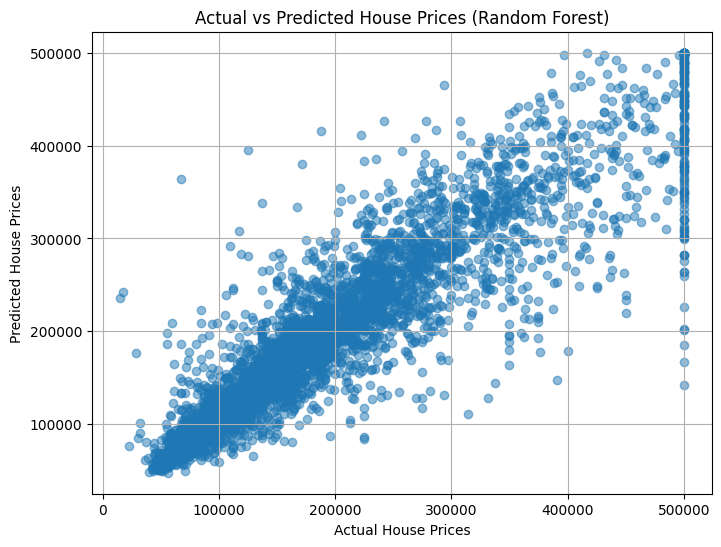

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs Predicted House Prices (Random Forest)")
plt.grid(True)
plt.show()


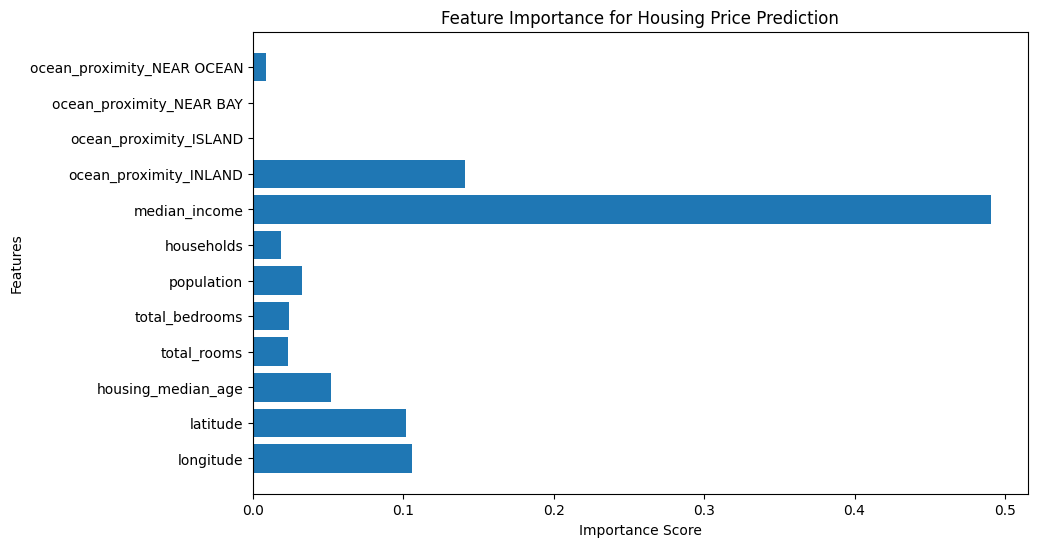

In [4]:
importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(10,6))
plt.barh(features, importances)
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance for Housing Price Prediction")
plt.show()


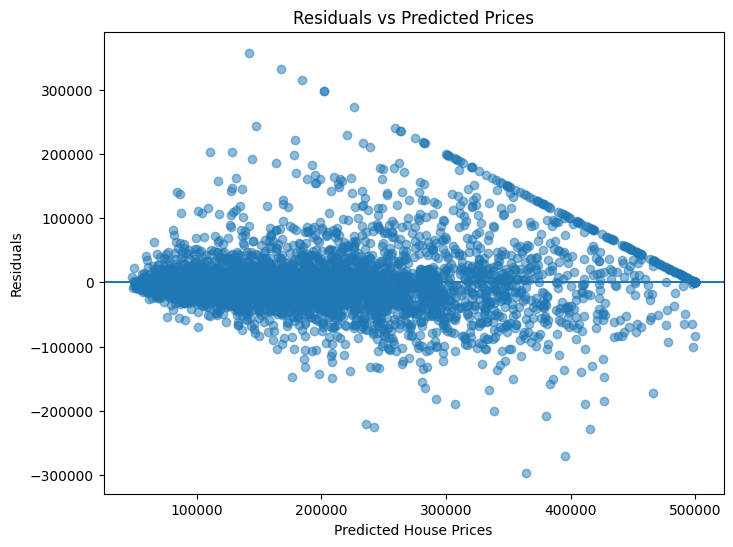

In [5]:
residuals = y_test - y_pred_rf

plt.figure(figsize=(8,6))
plt.scatter(y_pred_rf, residuals, alpha=0.5)
plt.axhline(y=0)
plt.xlabel("Predicted House Prices")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Prices")
plt.show()
